In [9]:
import import_ipynb
import SGC
import itertools
import numpy as np
import matplotlib.pyplot as plt
import functions as fun

## $B(C(9,28))$

In [10]:
avgCondC28=0.9753086419753086
avgCondCPrim28=0.6666666666666666
BC9_28=(avgCondC28-avgCondCPrim28)/avgCondC28
BC9_28

0.31645569620253167

## Block balance 

In [11]:
startLen=28

In [12]:
def complementCode(freeCodons):
    """Take codons which dont encode aminoacids and
    group they into blocks with diffrent last nucleotide."""
    blocks={}
    for codon in freeCodons:
        if codon[:-1] not in blocks:
            blocks[codon[:-1]]=set()
        blocks[codon[:-1]].add(codon)
    return blocks

In [13]:
def calculateBalance():
    codes=fun.generateAllMinCodes()
    results=[]
    for i in codes:
        for nucOrd,posOrd in codes[i]:
            codons,aa=fun.generateCodonsAndAA(nucOrd, posOrd)
            for j in range(i,65):
                complement=complementCode(codons[j:])
                newcodons=[]
                newaa=[]
                for newAA, codonSet in complement.items():
                    for codon in codonSet:
                        newaa.append(newAA)
                        newcodons.append(codon)
                condOld=fun.avarangeConductance(codons[:j], aa[:j])
                condNew=fun.avarangeConductance(newcodons, newaa)
                results.append((nucOrd, posOrd, j, condNew/condOld, condOld, len(set(newaa))))
    return results

In [14]:
balancesForOrderings=calculateBalance()

## Find optimal

In [15]:
balances=[(bal, splitPoint, nucOrd, posOrd, aaCount) for nucOrd,posOrd,splitPoint, bal, condOld, aaCount in balancesForOrderings]

balances.sort()

##### Balans:

- (0.0011022927689595674, 0.9294532627865961, 38, ('G', 'C', 'T', 'A'), (3, 2, 1)),
- (0.0022045855379188017, 0.8589065255731922, 55, ('A', 'C', 'T', 'G'), (1, 3, 2)),
- (0.03880070546737202, 0.8165784832451498, 61, ('C', 'A', 'G', 'T'), (1, 2, 3)

In [16]:
for b in balances:
    print(b)

(0.0, 64, ('A', 'C', 'G', 'T'), (1, 2, 3), 0)
(0.0, 64, ('A', 'C', 'G', 'T'), (1, 3, 2), 0)
(0.0, 64, ('A', 'C', 'G', 'T'), (2, 1, 3), 0)
(0.0, 64, ('A', 'C', 'G', 'T'), (2, 3, 1), 0)
(0.0, 64, ('A', 'C', 'G', 'T'), (3, 1, 2), 0)
(0.0, 64, ('A', 'C', 'G', 'T'), (3, 2, 1), 0)
(0.0, 64, ('A', 'C', 'T', 'G'), (1, 2, 3), 0)
(0.0, 64, ('A', 'C', 'T', 'G'), (1, 3, 2), 0)
(0.0, 64, ('A', 'C', 'T', 'G'), (2, 1, 3), 0)
(0.0, 64, ('A', 'C', 'T', 'G'), (2, 3, 1), 0)
(0.0, 64, ('A', 'C', 'T', 'G'), (3, 1, 2), 0)
(0.0, 64, ('A', 'C', 'T', 'G'), (3, 2, 1), 0)
(0.0, 64, ('A', 'G', 'C', 'T'), (1, 2, 3), 0)
(0.0, 64, ('A', 'G', 'C', 'T'), (1, 3, 2), 0)
(0.0, 64, ('A', 'G', 'C', 'T'), (2, 1, 3), 0)
(0.0, 64, ('A', 'G', 'C', 'T'), (2, 3, 1), 0)
(0.0, 64, ('A', 'G', 'C', 'T'), (3, 1, 2), 0)
(0.0, 64, ('A', 'G', 'C', 'T'), (3, 2, 1), 0)
(0.0, 64, ('A', 'G', 'T', 'C'), (1, 2, 3), 0)
(0.0, 64, ('A', 'G', 'T', 'C'), (1, 3, 2), 0)
(0.0, 64, ('A', 'G', 'T', 'C'), (2, 1, 3), 0)
(0.0, 64, ('A', 'G', 'T', 'C'), (2

In [17]:
minBalances={}
aaCount={}
for bal,splitPoint,nucOrd,posOrd, aaC in balances:
    if splitPoint not in minBalances:
        minBalances[splitPoint]=bal
        aaCount[splitPoint]=aaC
    else:
        if abs(1-minBalances[splitPoint])>abs(1-bal):
            minBalances[splitPoint]=bal
            aaCount[splitPoint]=aaC

$\Psi$

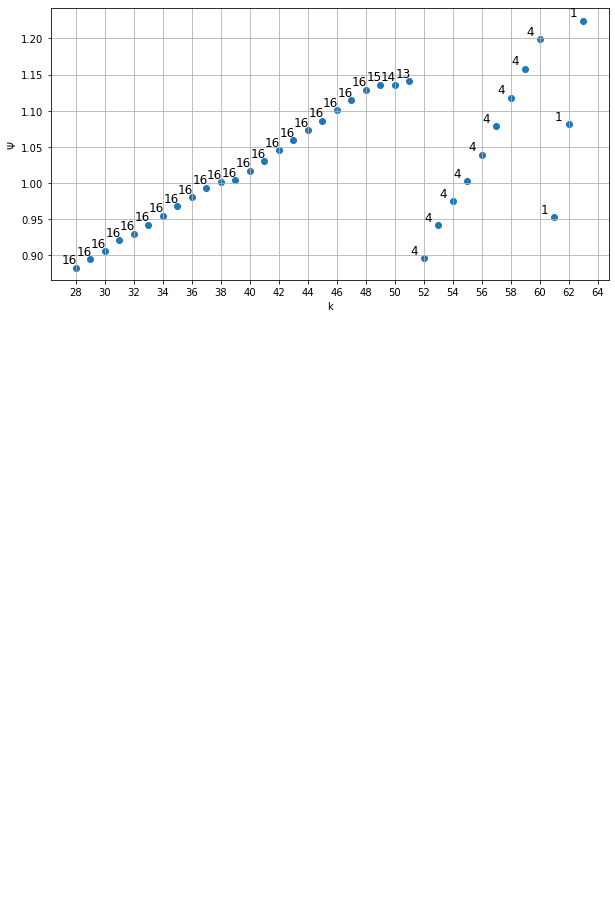

In [52]:
L=list(minBalances.items())
L.sort()
plt.xlabel("k")
plt.ylabel("Ψ")
plt.xticks(range(28,65,2))
for i in range(28,65):
    text=plt.annotate(aaCount[i],(i-0.95, minBalances[i]+0.006))
    text.set_size(12)
plt.gcf().set_size_inches(10,5)
#plt.ylim((0,0.85))
plt.scatter(range(28,64),np.array(L)[:-1,1])
plt.grid(True)

plt.savefig("../Obrazy/balanceBetweenOldAndNewSym.pdf",dpi=1000)
plt.show()

In [48]:
X.get_size()

10.0

In [46]:
dir(X)

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_agg_filter',
 '_alias_map',
 '_alpha',
 '_animated',
 '_annotation_clip',
 '_axes',
 '_bbox_patch',
 '_cached',
 '_check_xy',
 '_clipon',
 '_clippath',
 '_color',
 '_contains',
 '_default_contains',
 '_draggable',
 '_draw_bbox',
 '_fontproperties',
 '_get_clipping_extent_bbox',
 '_get_dist_to_box',
 '_get_layout',
 '_get_multialignment',
 '_get_position_xy',
 '_get_ref_xy',
 '_get_rendered_text_width',
 '_get_wrap_line_width',
 '_get_wrapped_text',
 '_get_xy',
 '_get_xy_display',
 '_get_xy_transform',
 '_gid',
 '_horizontalalignment',
 '_in_layout',
 '_label',
 '_linespacing',
 '_mouseover',
 '_multiali

## Analize of optimal

In [19]:
def analizeCodunctanceBalance(nucOrd,posOrd,splitPoint):
    codons,aa=fun.generateCodonsAndAA(nucOrd, posOrd)
    complement=complementCode(codons[splitPoint:])
    newcodons=[]
    newaa=[]
    for newAA, codonSet in complement.items():
        for codon in codonSet:
            newaa.append(newAA)
            newcodons.append(codon)
    condOld=fun.avarangeConductance(codons[:splitPoint], aa[:splitPoint])
    condNew=fun.avarangeConductance(newcodons, newaa)

    print("Conductance of old aminoacids:",condOld)
    print("Conductance of new aminoacids:",condNew)
    print("Reminder old-new: ",condOld-condNew)
    print("New blocks:")
    print(complement)
    print("New aminoacids:",len(complement))

In [20]:
analizeCodunctanceBalance(('G', 'C', 'T', 'A'),(3, 2, 1),38)

Conductance of old aminoacids: 0.9294532627865961
Conductance of new aminoacids: 0.9305555555555557
Reminder old-new:  -0.0011022927689595674
New blocks:
{'TC': {'TCT', 'TCA'}, 'AC': {'ACT', 'ACA'}, 'GT': {'GTT', 'GTA'}, 'CT': {'CTT', 'CTA'}, 'TT': {'TTT', 'TTA'}, 'AT': {'ATT', 'ATA'}, 'GA': {'GAT', 'GAA'}, 'CA': {'CAT', 'CAA'}, 'TA': {'TAT', 'TAA'}, 'AA': {'AAA', 'AAT'}, 'GG': {'GGA'}, 'CG': {'CGA'}, 'TG': {'TGA'}, 'AG': {'AGA'}, 'GC': {'GCA'}, 'CC': {'CCA'}}
New aminoacids: 16


In [21]:
analizeCodunctanceBalance(('A', 'C', 'T', 'G'), (1, 3, 2),55)

Conductance of old aminoacids: 0.8589065255731922
Conductance of new aminoacids: 0.861111111111111
Reminder old-new:  -0.0022045855379188017
New blocks:
{'GG': {'GGG', 'GGT', 'GGC'}, 'GA': {'GAT', 'GAG'}, 'GC': {'GCG', 'GCT'}, 'GT': {'GTG', 'GTT'}}
New aminoacids: 4


In [22]:
analizeCodunctanceBalance(('C', 'A', 'G', 'T'), (1, 2, 3),61)

Conductance of old aminoacids: 0.8165784832451498
Conductance of new aminoacids: 0.7777777777777778
Reminder old-new:  0.03880070546737202
New blocks:
{'TT': {'TTT', 'TTA', 'TTG'}}
New aminoacids: 1


In [23]:
plotDataX=[splitPoint for nucOrd,posOrd,splitPoint, bal, condOld in balancesForOrderings]
plotDataY=[bal/condOld for nucOrd,posOrd,splitPoint, bal, condOld in balancesForOrderings]
plotDataZ=[condOld for nucOrd,posOrd,splitPoint, bal, condOld in balancesForOrderings]

<IPython.core.display.Javascript object>


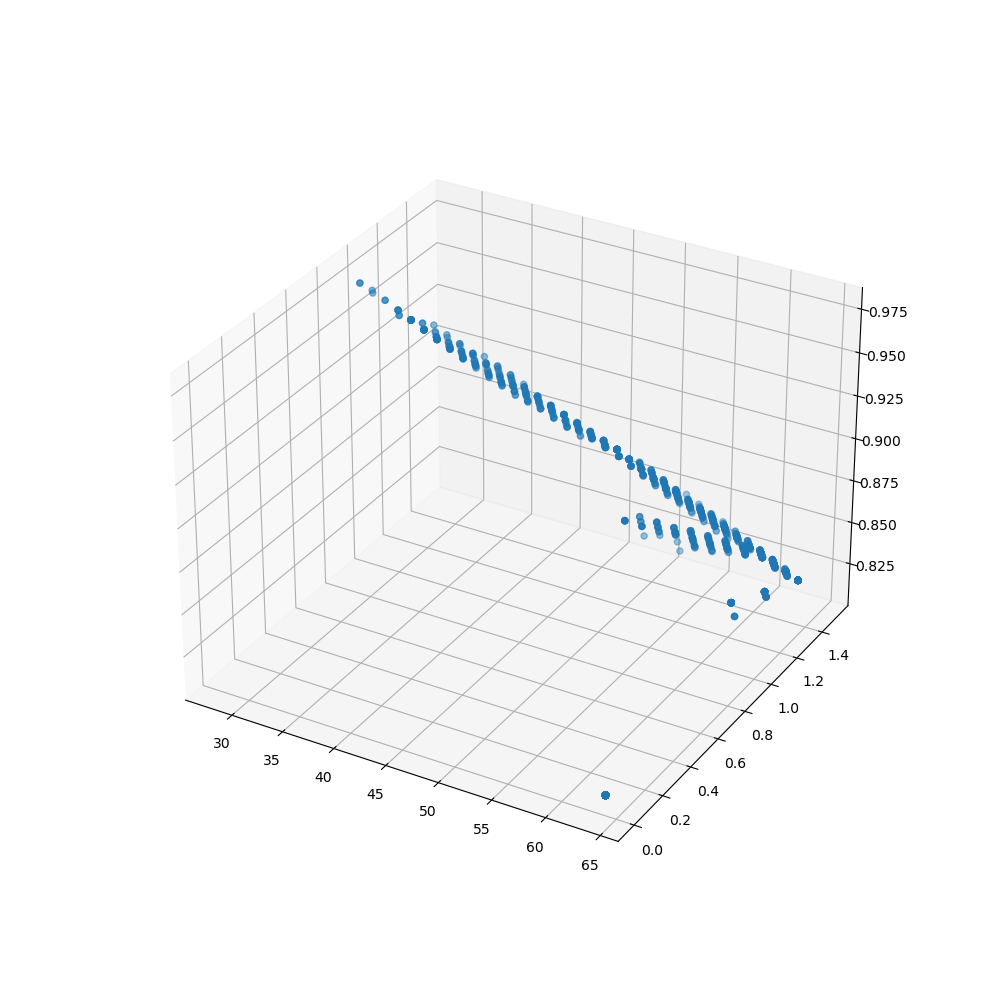

In [28]:
fig = plt.figure()
fig.set_size_inches(10,10)
ax = fig.add_subplot(111, projection='3d')
ax.scatter(plotDataX, plotDataY, plotDataZ)

In [25]:
%matplotlib notebook

In [26]:
dir(ax.yaxis)

['OFFSETTEXTPAD',
 '_AXINFO',
 '_PLANES',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__name__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_agg_filter',
 '_alpha',
 '_animated',
 '_autolabelpos',
 '_axes',
 '_axinfo',
 '_clipon',
 '_clippath',
 '_contains',
 '_copy_tick_props',
 '_default_contains',
 '_format_with_dict',
 '_get_clipping_extent_bbox',
 '_get_coord_info',
 '_get_tick',
 '_get_tick_bboxes',
 '_get_tick_boxes_siblings',
 '_get_tick_label_size',
 '_get_ticks_position',
 '_gid',
 '_gridOnMajor',
 '_gridOnMinor',
 '_in_layout',
 '_label',
 '_major_tick_kw',
 '_minor_tick_kw',
 '_mouseover',
 '_oid',
 '_path_effects',
 '_picker',
 '_propobservers',
 '_rasterized',
 '_remove_met

In [27]:
ax.set

<bound method Artist.set of <Axes3DSubplot:>>